In [2]:
import pandas as pd

# Load Data

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test = pd.read_csv('test.csv')

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Data Cleaning

1. cek tipe data dari tiap atribut dengan menampilkan ringkasan informasi

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


2. pemeriksaan missing values di setiap kolom


In [9]:
missing_values = train.isnull().sum()
missing_values[missing_values > 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


3. Mengatasi Missing values

In [10]:
# Pertama : pisahkan kolom yang memiliki missing values lebih dari 75% dan kurang dari 75%
less = missing_values[missing_values < 1000].index
over = missing_values[missing_values > 1000].index

Mengisi Nilai yang Hilang: data di atas terdapat beberapa fitur yang memiliki missing value kurang dari 75% dari jumlah skala pada data. Namun, perlu Anda catat bahwa seluruh fitur tersebut memiliki tipe data yang berbeda. Sehingga penanganan missing value-nya pun perlu dibedakan.

In [11]:
# mengatasi missing value untuk tipe data numerik.

numeric_features = train[less].select_dtypes(include=['number']).columns #memilih nama-nama kolom dari DataFrame train yang memiliki tipe data numerik dari subset kolom yang ditentukan oleh less.
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median()) #mengisi nilai kosonh dengan median

In [12]:
# mengatasi missing value untuk tipe data non numeric
kategorical_features = train[less].select_dtypes(include=['object']).columns

for column in kategorical_features:
  train[column] = train[column].fillna(train[column].mode()[0])

drop table yang missing valuenya lebih dari 1000

In [13]:
df = train.drop(columns = over)

pemeriksaan missing value

In [14]:
missing_values = df.isnull().sum()
missing_values[missing_values >0]

,0


4. Mengatasi Outlier


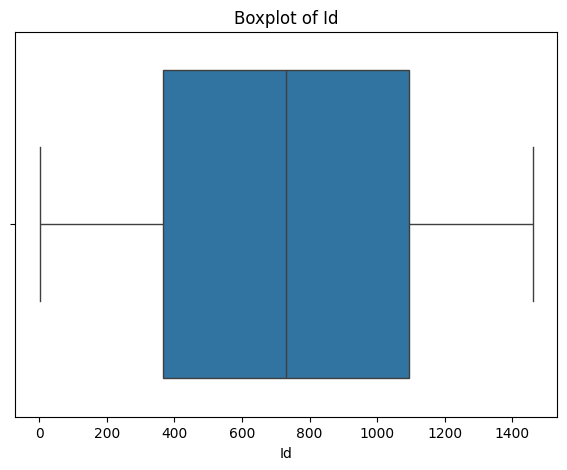

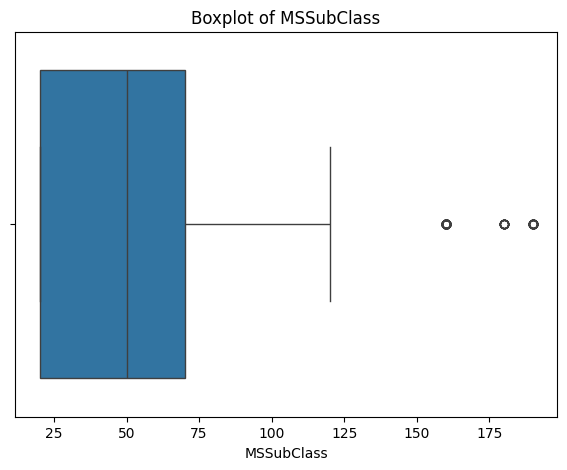

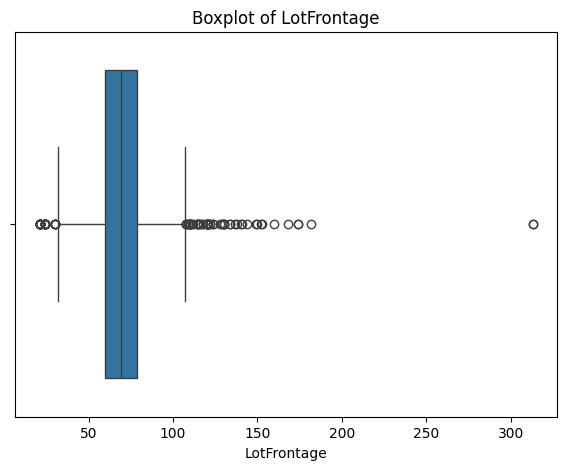

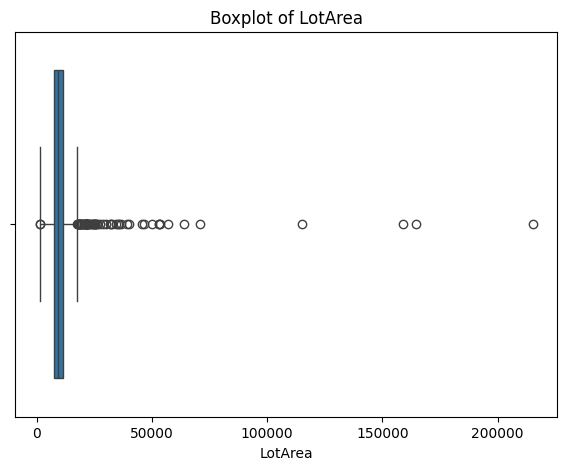

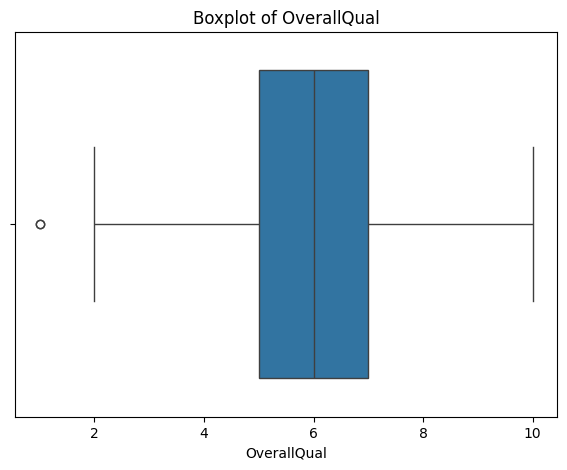

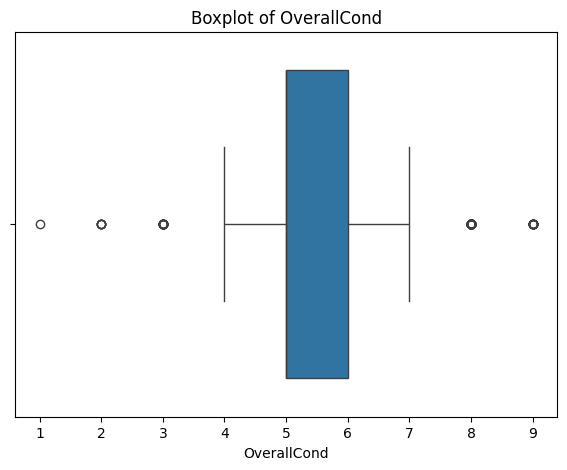

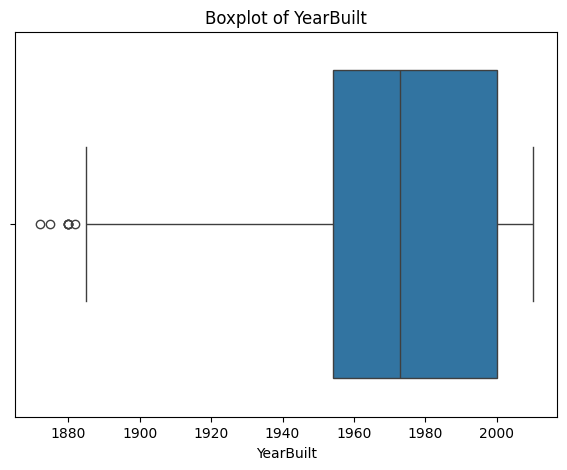

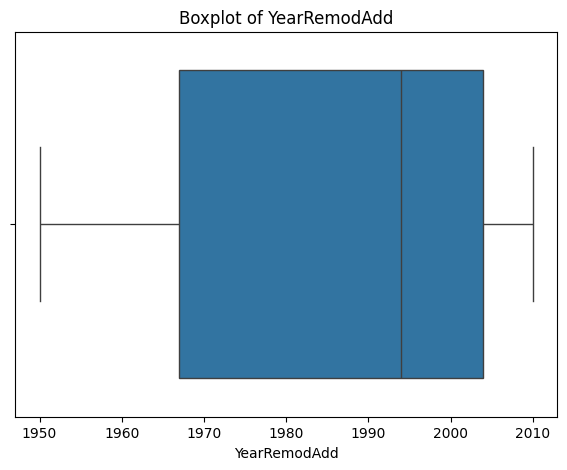

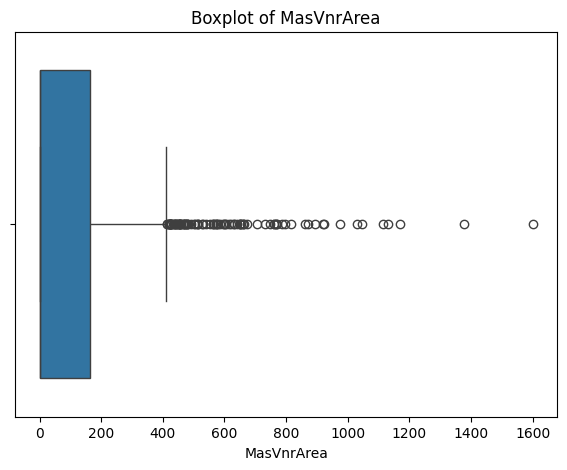

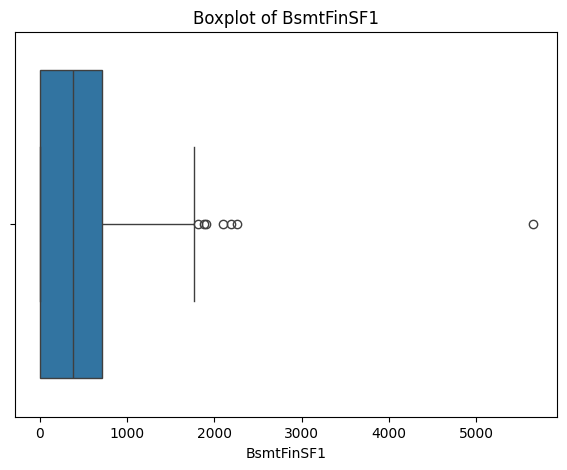

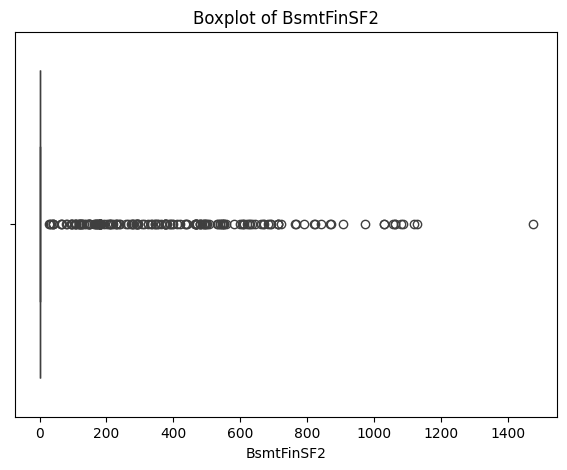

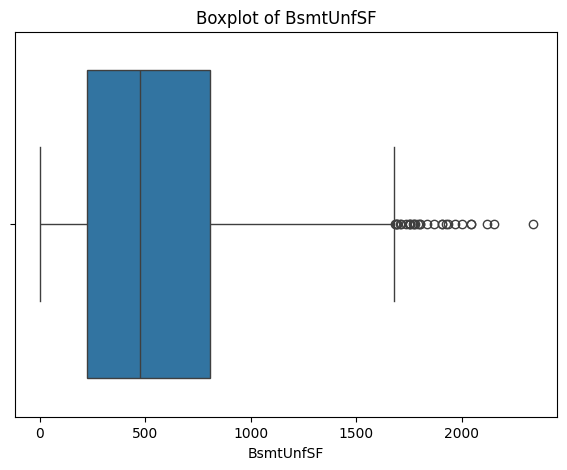

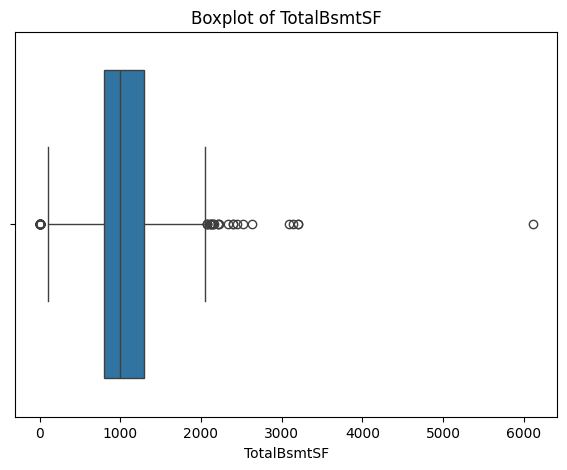

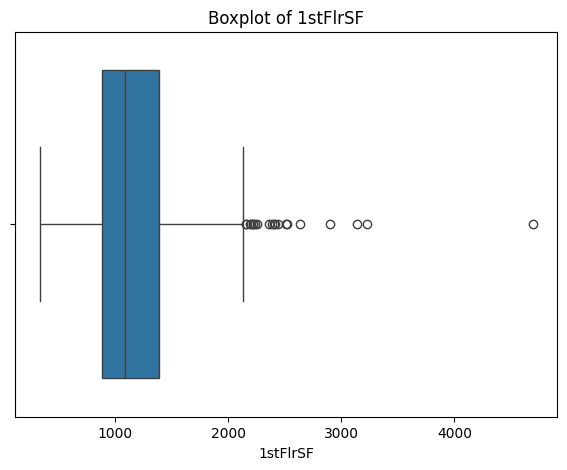

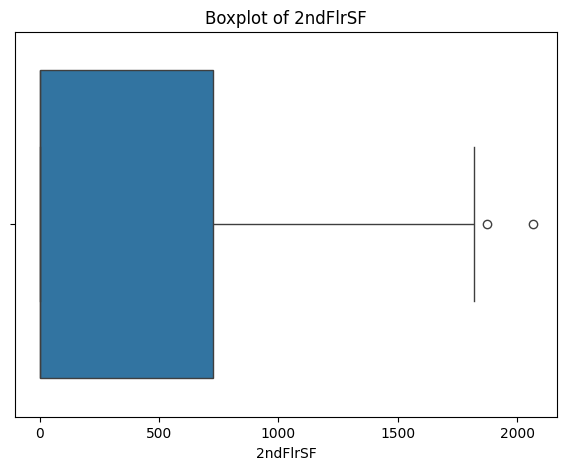

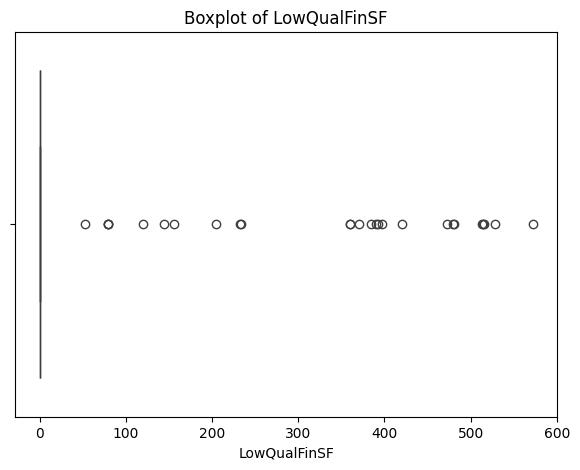

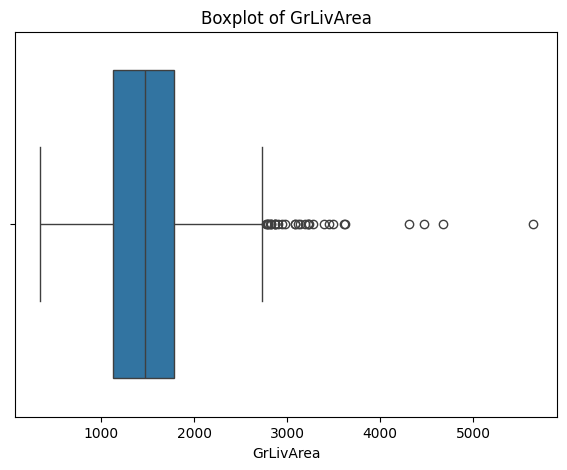

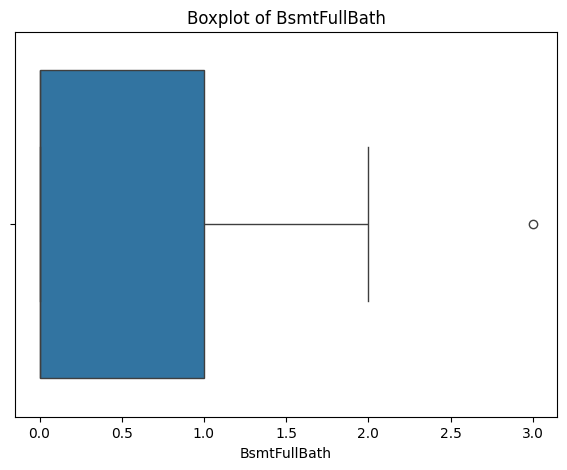

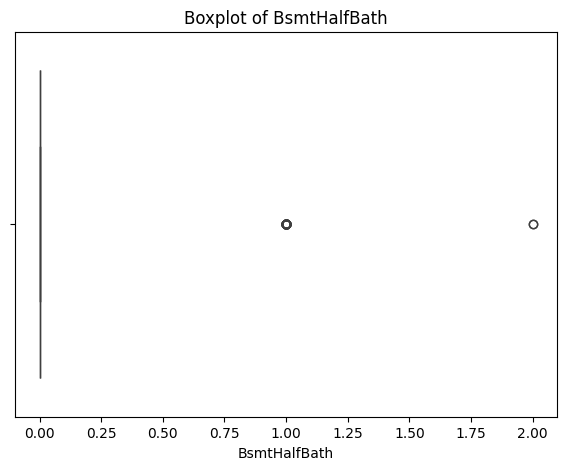

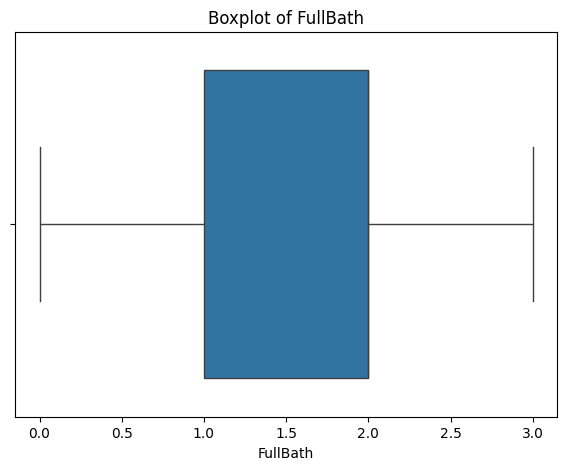

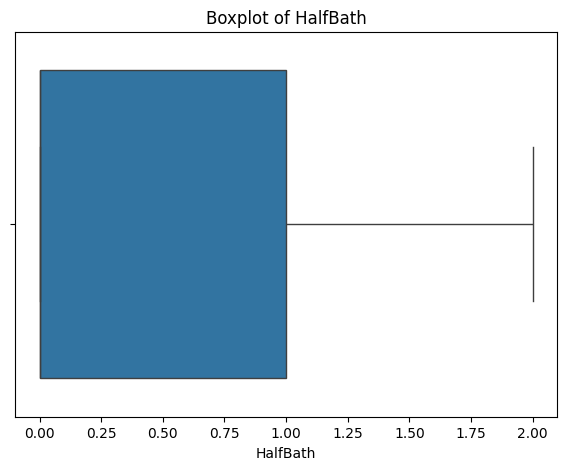

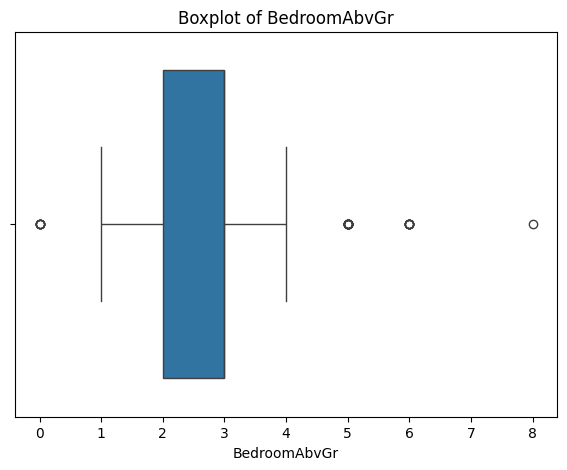

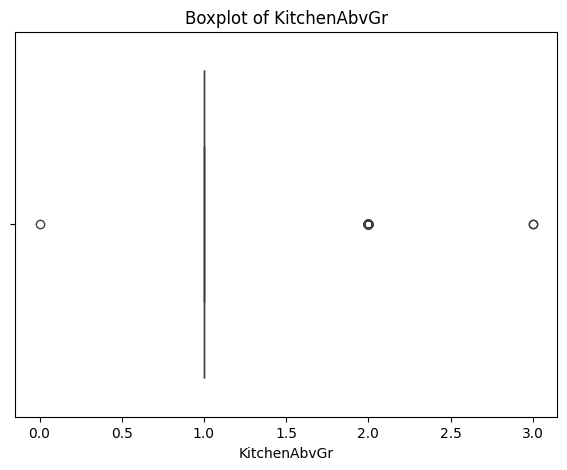

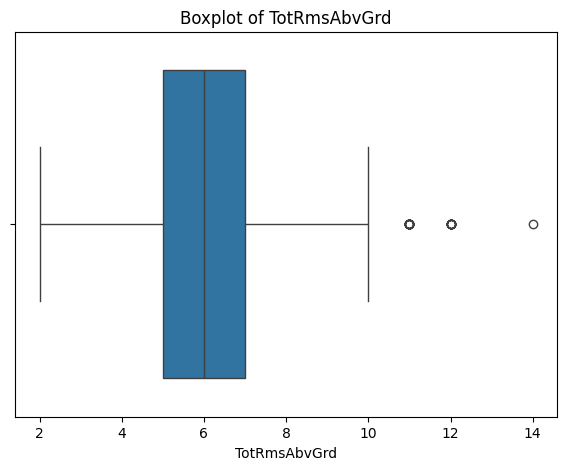

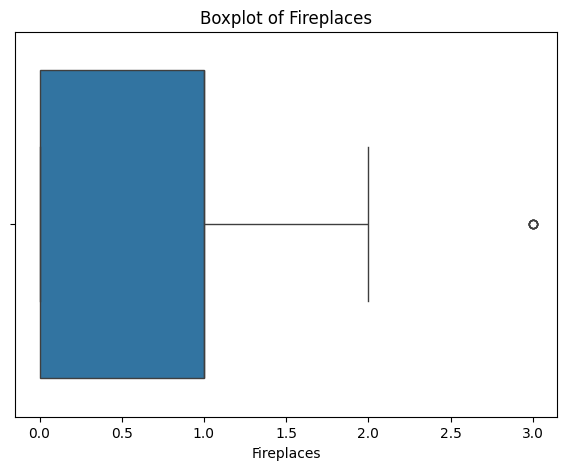

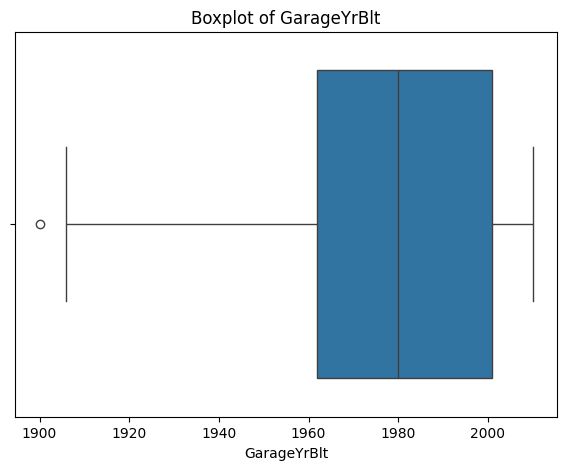

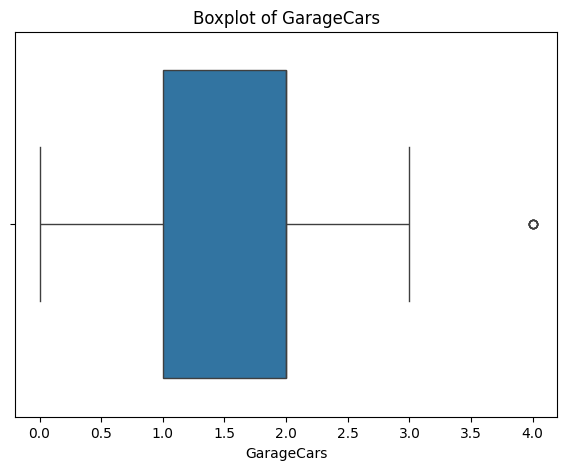

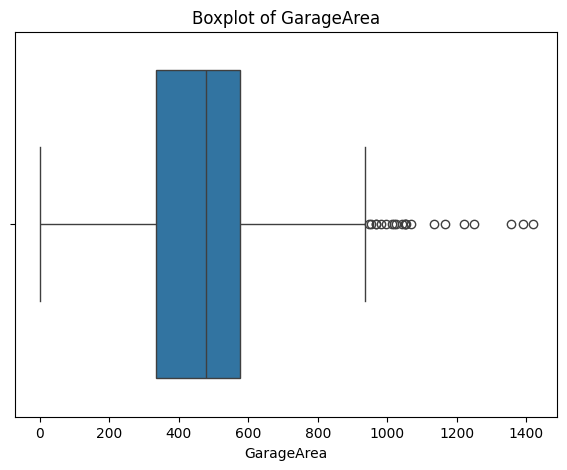

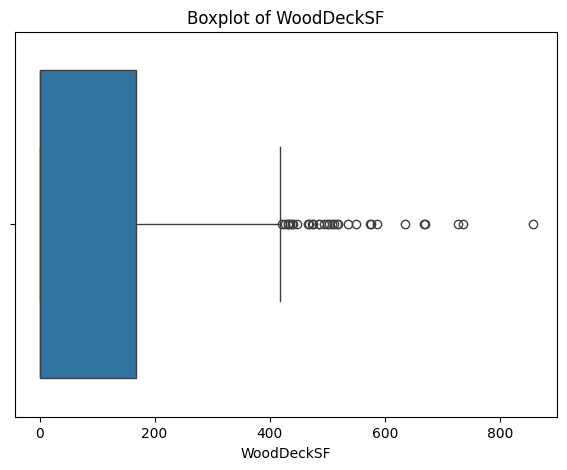

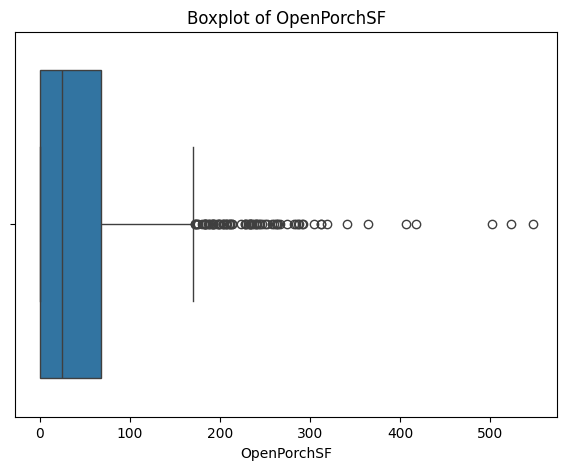

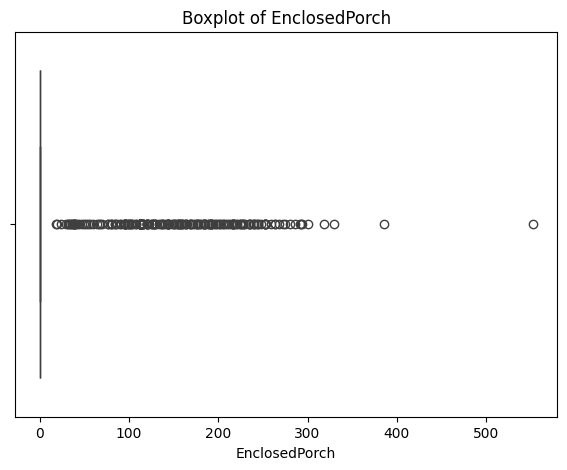

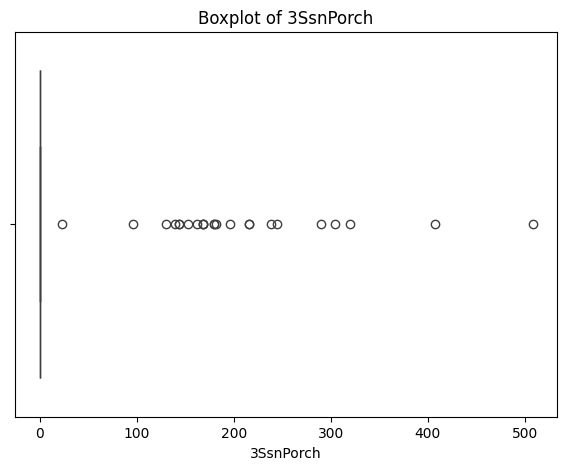

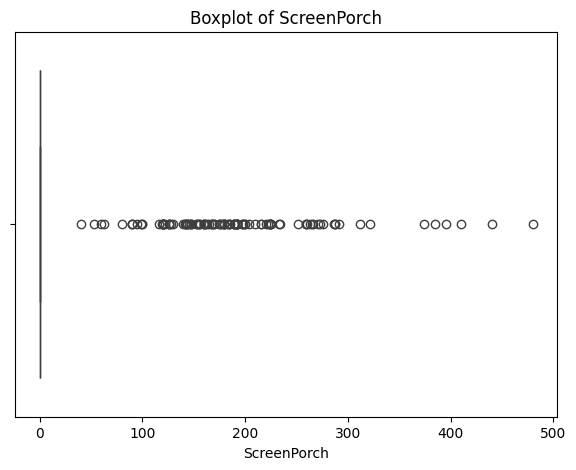

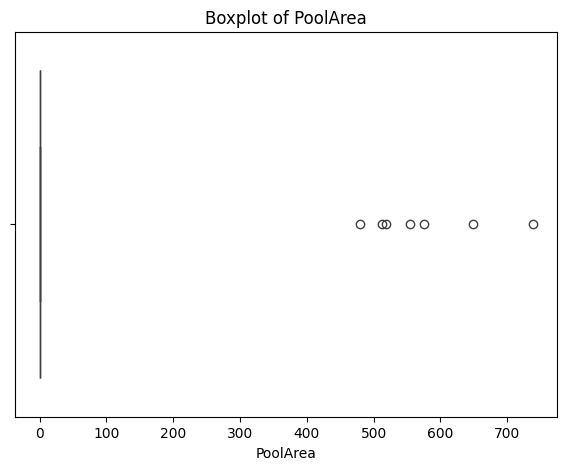

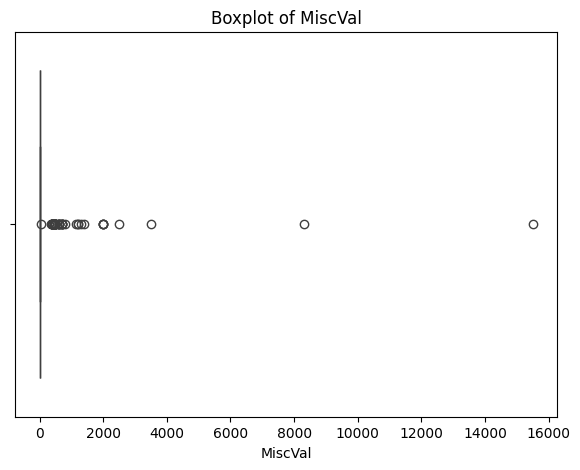

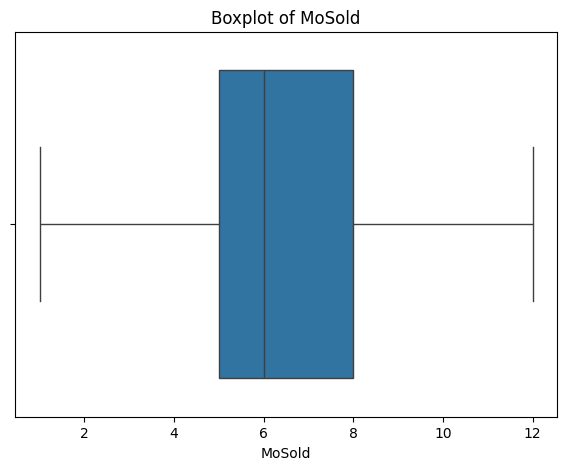

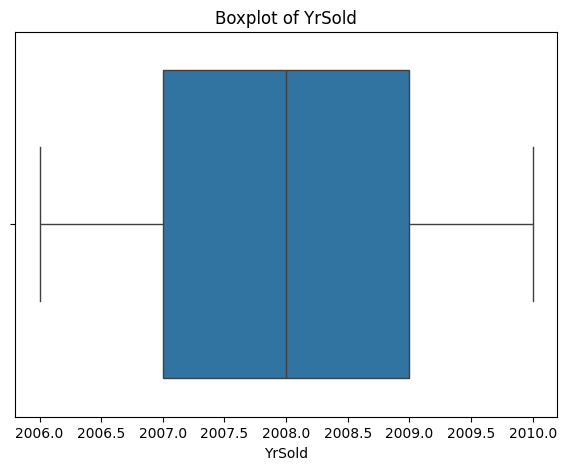

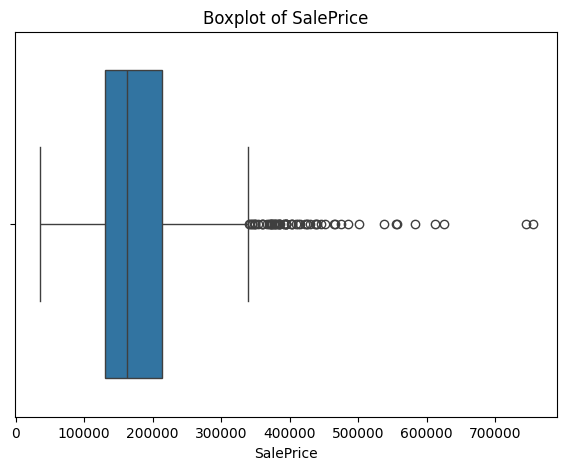

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numeric_features:
  plt.figure(figsize=(7, 5))
  sns.boxplot(x=df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

In [16]:
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)


Q1: Id                  365.75
MSSubClass           20.00
LotFrontage          60.00
LotArea            7553.50
OverallQual           5.00
OverallCond           5.00
YearBuilt          1954.00
YearRemodAdd       1967.00
MasVnrArea            0.00
BsmtFinSF1            0.00
BsmtFinSF2            0.00
BsmtUnfSF           223.00
TotalBsmtSF         795.75
1stFlrSF            882.00
2ndFlrSF              0.00
LowQualFinSF          0.00
GrLivArea          1129.50
BsmtFullBath          0.00
BsmtHalfBath          0.00
FullBath              1.00
HalfBath              0.00
BedroomAbvGr          2.00
KitchenAbvGr          1.00
TotRmsAbvGrd          5.00
Fireplaces            0.00
GarageYrBlt        1962.00
GarageCars            1.00
GarageArea          334.50
WoodDeckSF            0.00
OpenPorchSF           0.00
EnclosedPorch         0.00
3SsnPorch             0.00
ScreenPorch           0.00
PoolArea              0.00
MiscVal               0.00
MoSold                5.00
YrSold             2007.

In [17]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

print(df_filtered_numeric)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
2        3          60         68.0    11250            7            5   
4        5          60         84.0    14260            8            5   
6        7          20         75.0    10084            8            5   
10      11          20         70.0    11200            5            5   
...    ...         ...          ...      ...          ...          ...   
1448  1449          50         70.0    11767            4            7   
1451  1452          20         78.0     9262            8            5   
1453  1454          20         90.0    17217            5            5   
1454  1455          20         62.0     7500            7            5   
1455  1456          60         62.0     7917            6            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       1

In [18]:
# Menggabungkan kembali dengan kolom kategorikal
kategorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition,kategorical_features]], axis=1)

Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_count = 0;
for value in df['SalePrice']:
  if (value < lower_bound or value > upper_bound ):
    outlier_count += 1

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('Lower Bound:',lower_bound)
print('Upper Bound:',upper_bound)
print('Outlier : ',outlier_count)



Q1: 137500.0
Q3: 213500.0
IQR: 76000.0
Lower Bound: 23500.0
Upper Bound: 327500.0
Outlier :  5


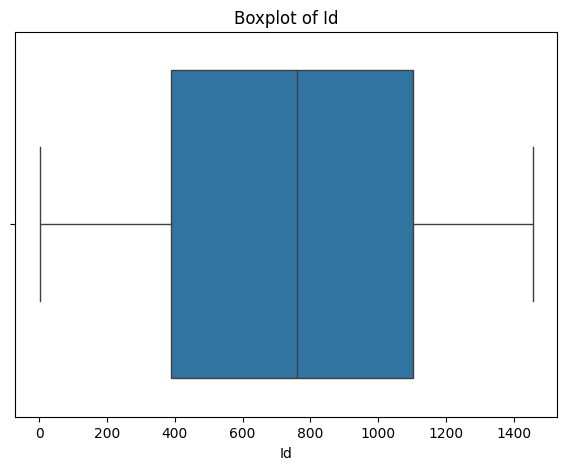

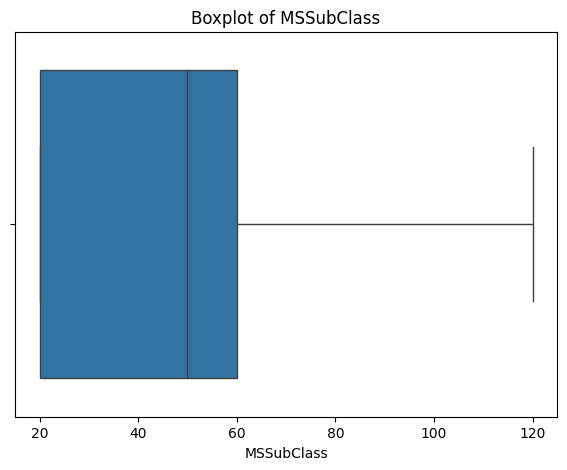

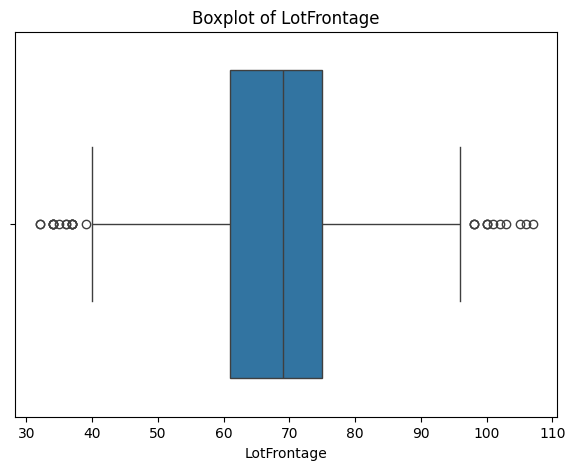

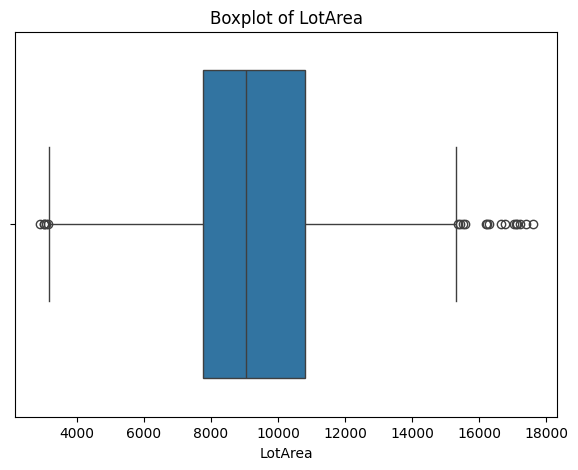

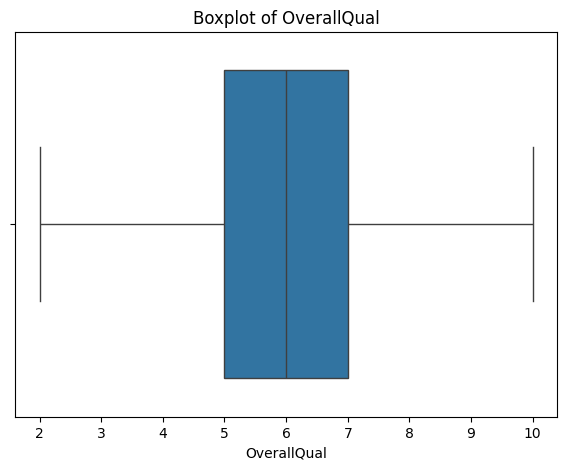

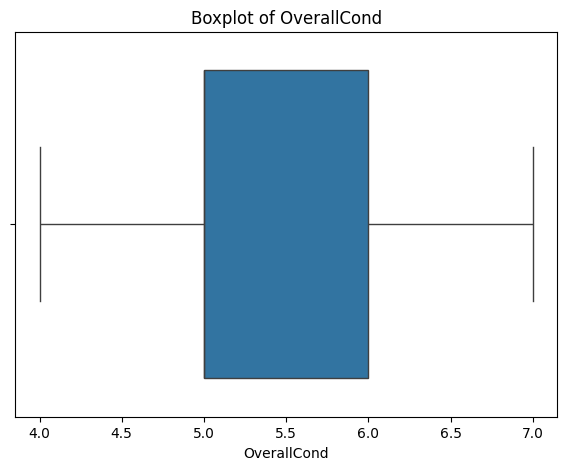

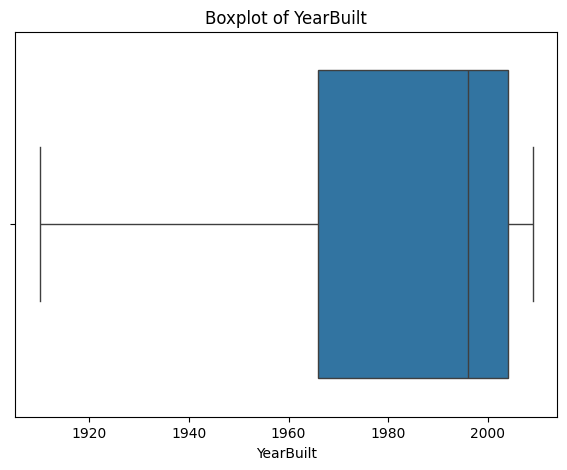

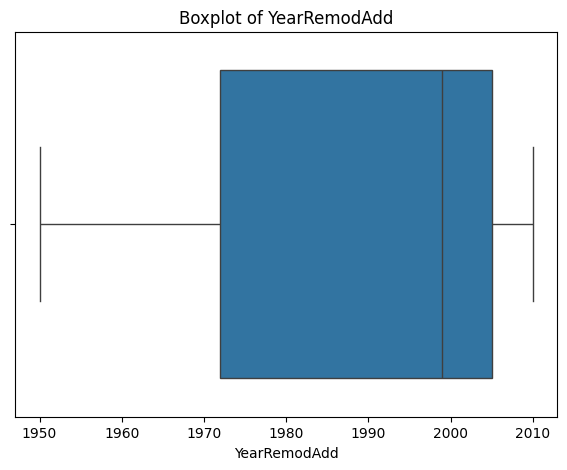

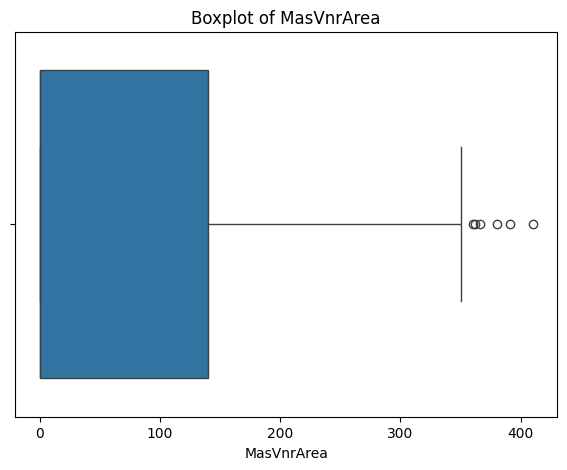

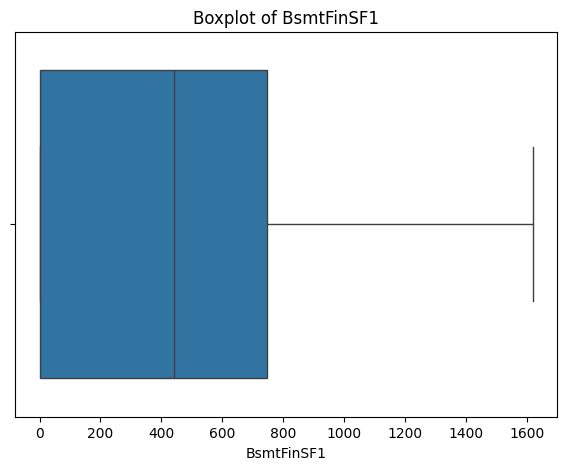

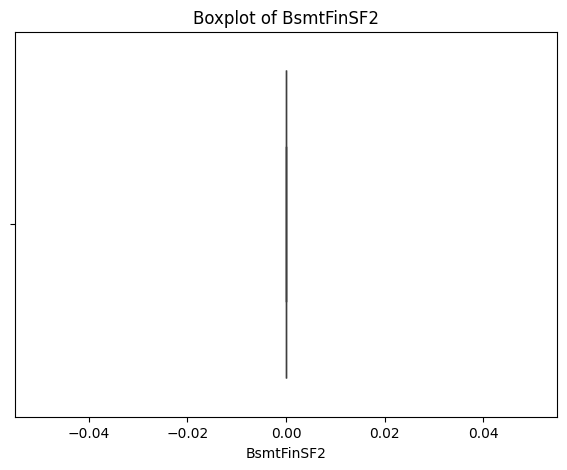

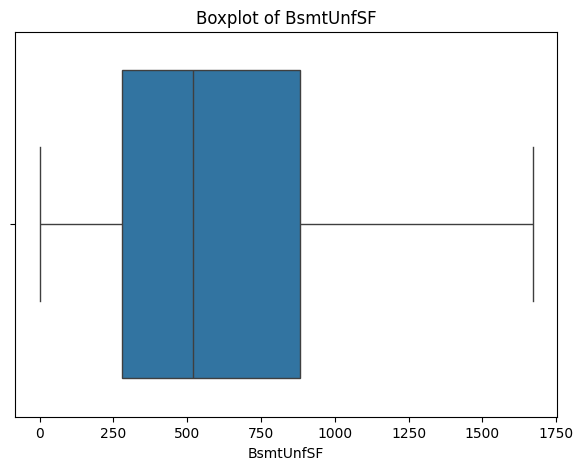

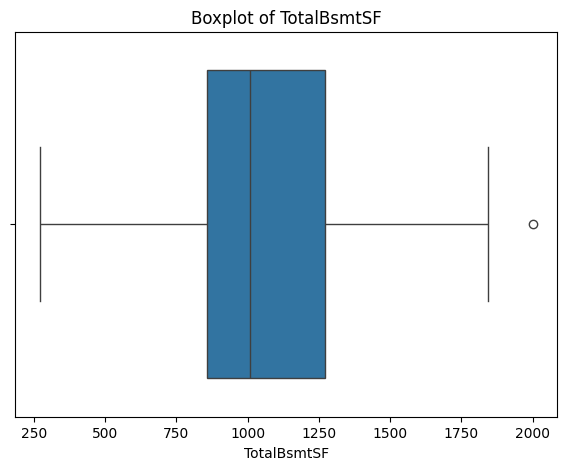

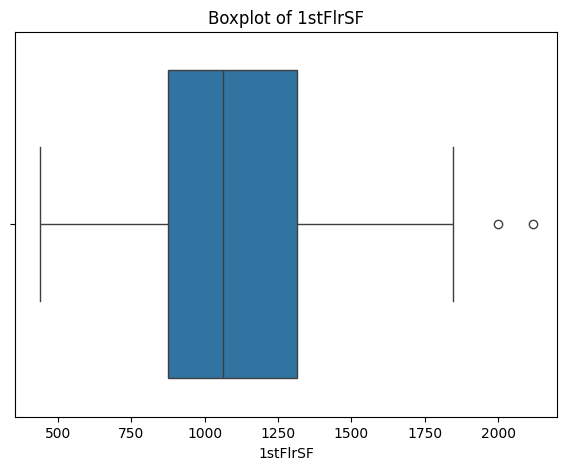

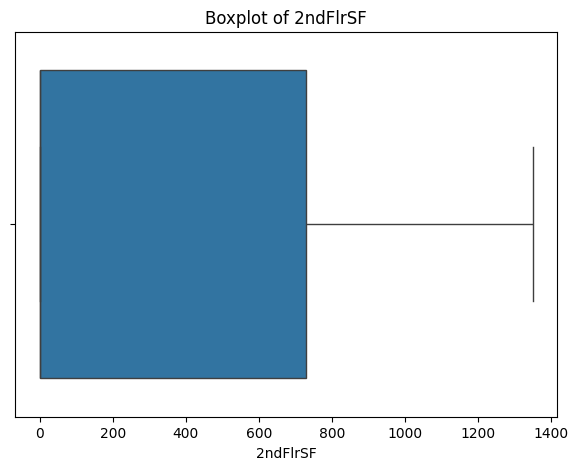

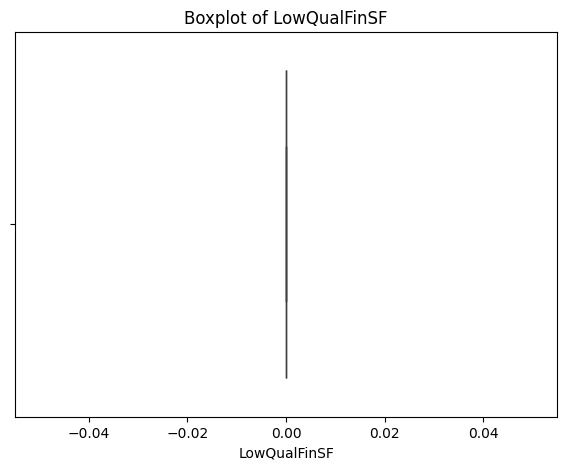

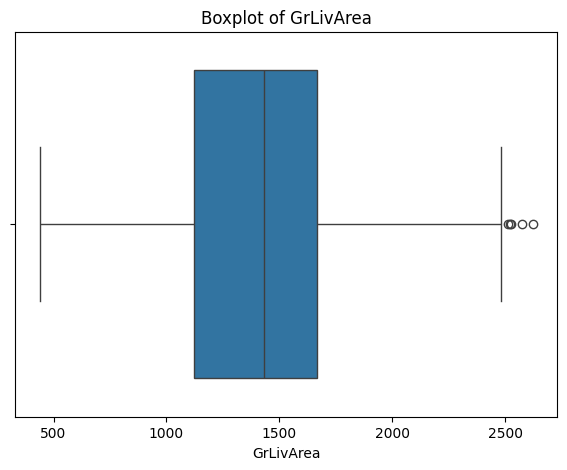

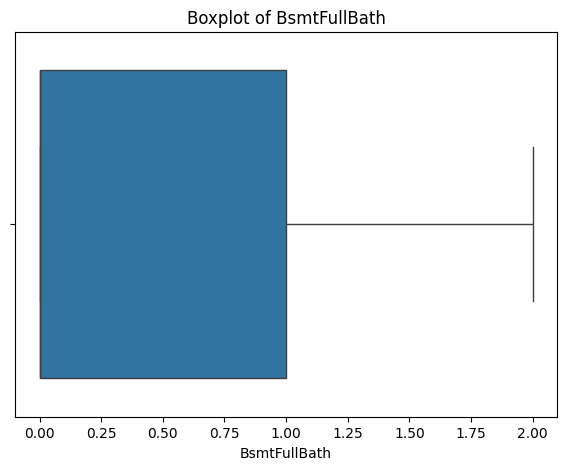

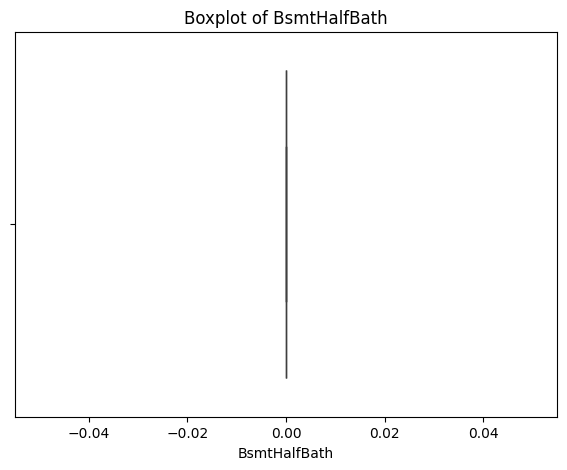

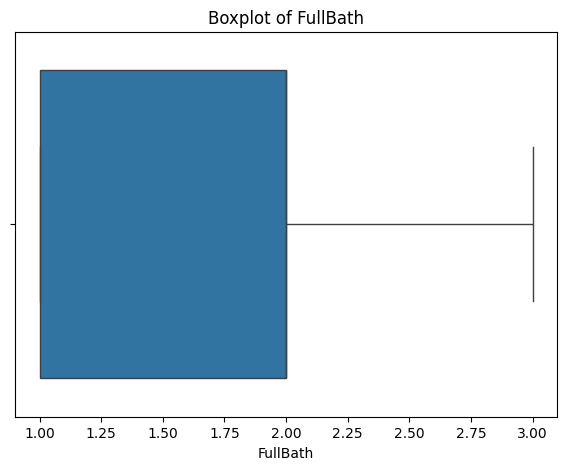

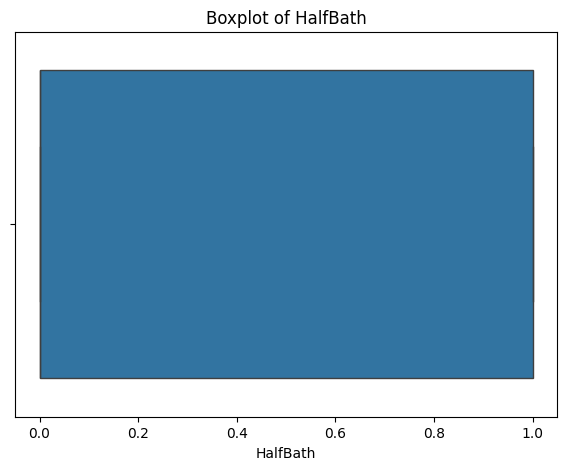

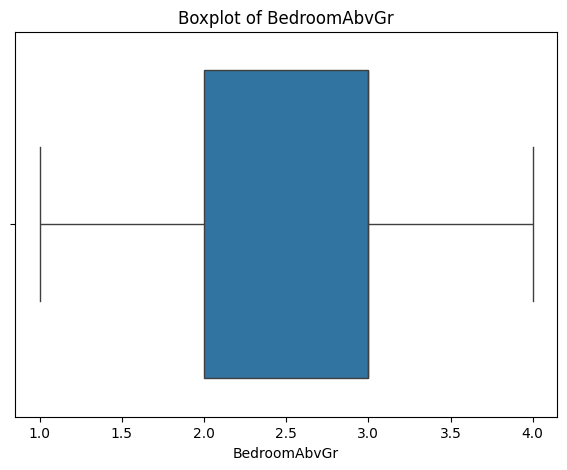

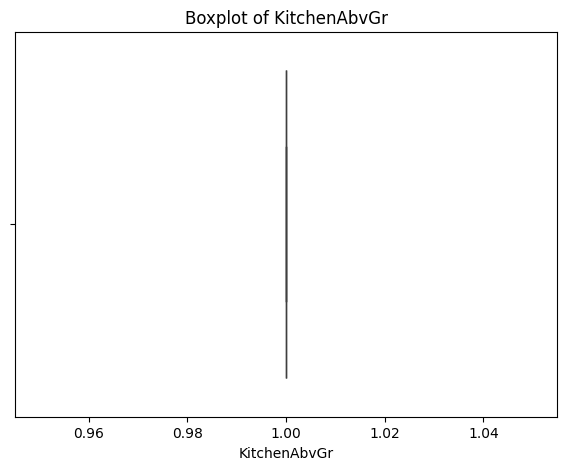

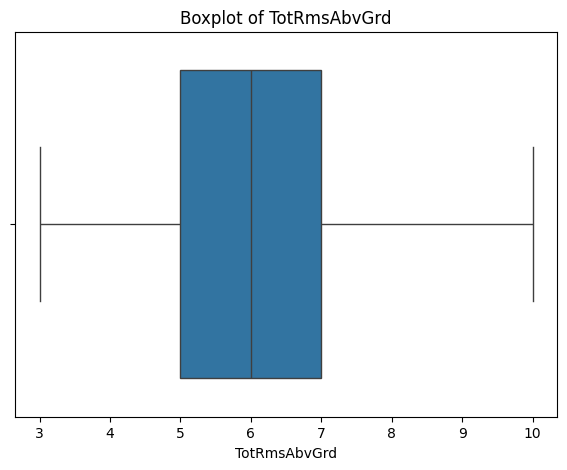

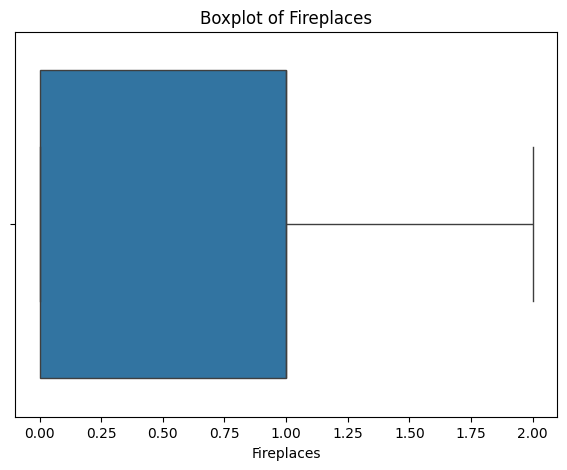

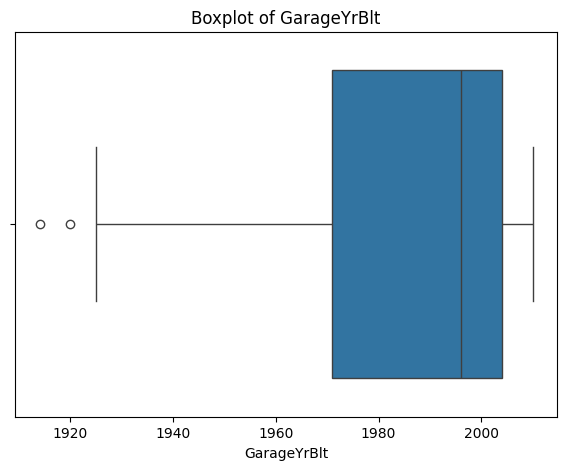

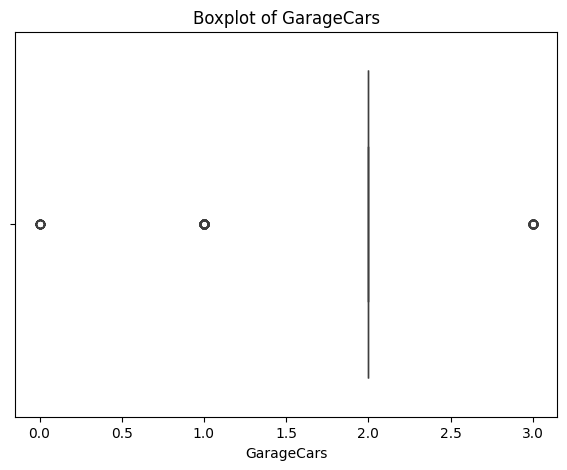

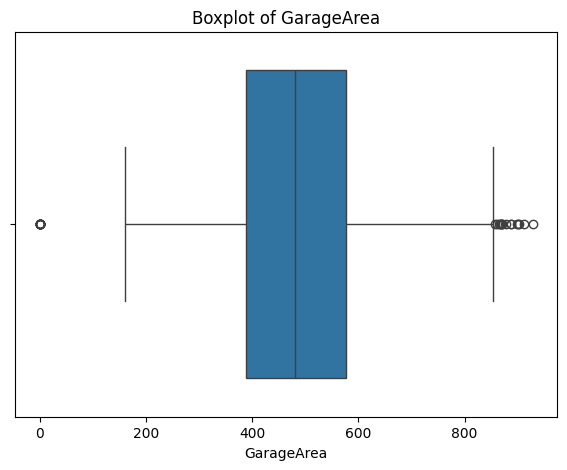

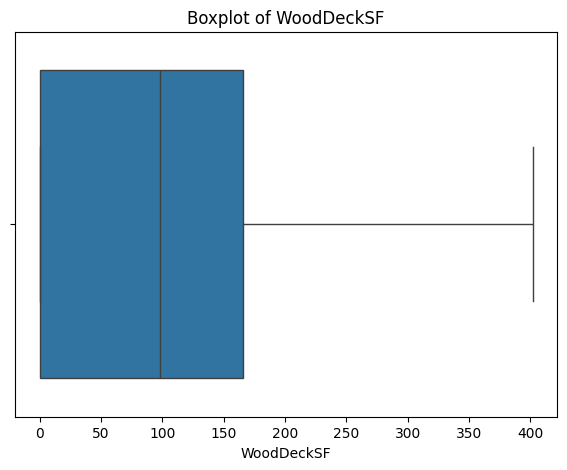

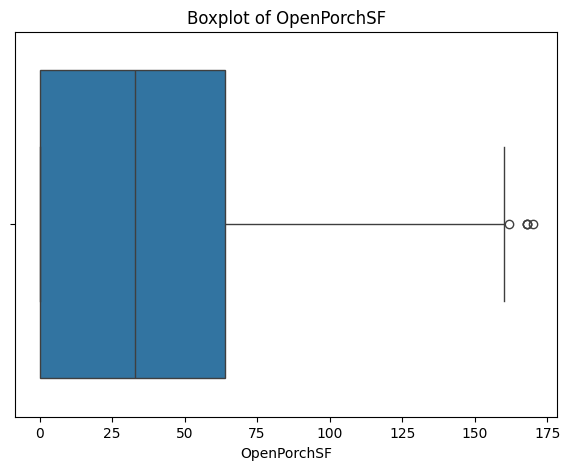

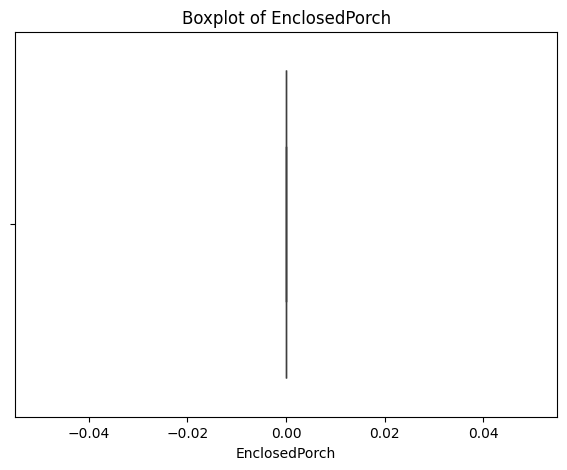

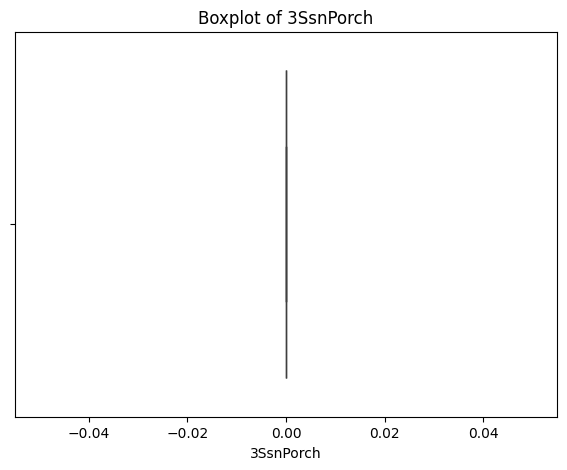

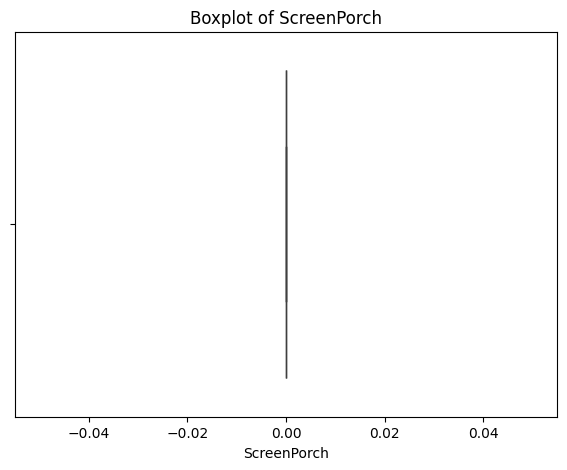

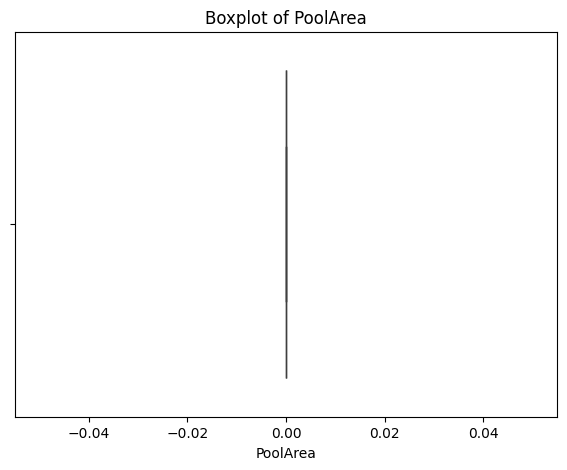

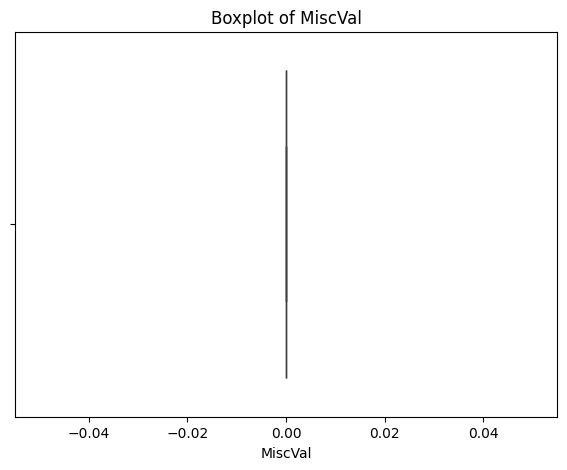

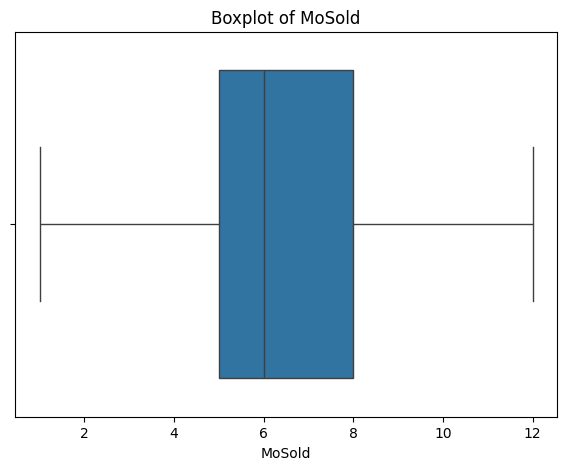

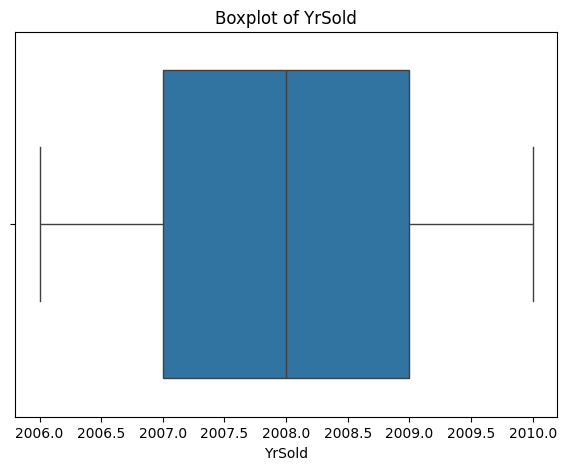

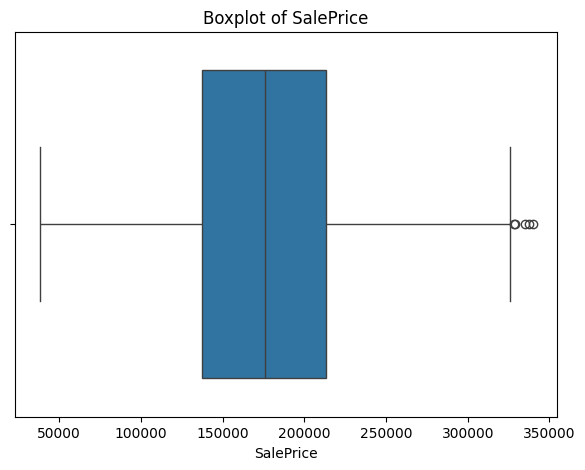

In [19]:
for feature in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(7, 5))
  sns.boxplot(x=df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

In [20]:
# Q1 = df['SalePrice'].quantile(0.25)
# Q3 = df['SalePrice'].quantile(0.75)
# IQR = Q3-Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR


# df['SalePrice'] = df['SalePrice'].apply(lambda x: (Q1 - 1.5 * IQR) if (x < lower_bound)else (Q3 + 1.5* IQR) if (x > upper_bound) else x)

In [21]:
# for feature in df.select_dtypes(include=['number']).columns:
#   plt.figure(figsize=(7, 5))
#   sns.boxplot(x=df[feature])
#   plt.title(f'Boxplot of {feature}')
#   plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

Text(0.5, 1.0, 'Histogram Sebelum Standardisasi')

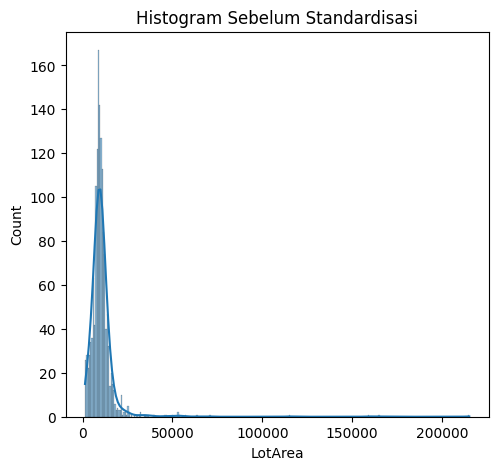

In [23]:
# Histogram Sebelum Standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train[numeric_features[3]], kde=True)
plt.title("Histogram Sebelum Standardisasi")


Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

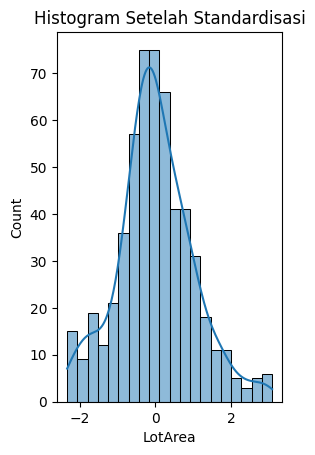

In [24]:
# Histogram Setelah Standardisasi
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title("Histogram Setelah Standardisasi")

5. Mengatasi duplikasi data

In [25]:
#periksa baris duplikat
duplicate = df.duplicated()
print('Baris duplikat: ')
print(df[duplicate])

Baris duplikat: 
Empty DataFrame
Columns: [Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, SaleType, SaleCondition]
Index: []

[0 rows x 77 columns]


6. Mengonversi tipe data


In [26]:
categorical_features = df.select_dtypes(['object']).columns
df[categorical_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
10,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,TA,Min2,Gd,Detchd,Unf,Fa,TA,Y,WD,Normal
1451,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,New,Partial
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Abnorml
1454,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


In [27]:
#one hot encoding

df_one_hot = pd.get_dummies(df, columns=categorical_features)
df_one_hot

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,False,False,False,False,True,False,False,False,True,False
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,False,False,False,False,True,False,False,False,True,False
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,False,False,False,False,True,False,False,False,True,False
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,False,False,False,False,True,False,False,False,True,False
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,False,False,False,False,True,False,False,False,True,False
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,False,False,True,False,False,False,False,False,False,True
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,False,False,False,False,True,True,False,False,False,False
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,False,False,False,False,True,False,False,False,True,False


In [28]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for col in categorical_features:
  df_lencoder[col] = label_encoder.fit_transform(df_lencoder[col])


df_lencoder

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,2,4,2,0,1,2,3,2,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,2,4,4,0,1,2,3,2,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,2,4,4,0,1,2,3,2,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,2,4,2,0,1,2,3,2,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,4,2,3,2,2,3,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,3,3,2,3,2,0,3,2,8,3
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,0,4,2,0,0,2,3,2,6,4
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,3,4,2,0,2,2,3,2,8,0
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,2,4,2,0,1,2,3,2,8,3


In [29]:
df_lencoder.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,2,4,2,0,1,2,3,2,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,2,4,4,0,1,2,3,2,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,2,4,4,0,1,2,3,2,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,2,4,2,0,1,2,3,2,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,4,2,3,2,2,3,2,8,3


In [30]:
df_lencoder.info()

<class 'pandas.core.frame.DataFrame'>
Index: 557 entries, 0 to 1455
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             557 non-null    float64
 1   MSSubClass     557 non-null    float64
 2   LotFrontage    557 non-null    float64
 3   LotArea        557 non-null    float64
 4   OverallQual    557 non-null    float64
 5   OverallCond    557 non-null    float64
 6   YearBuilt      557 non-null    float64
 7   YearRemodAdd   557 non-null    float64
 8   MasVnrArea     557 non-null    float64
 9   BsmtFinSF1     557 non-null    float64
 10  BsmtFinSF2     557 non-null    float64
 11  BsmtUnfSF      557 non-null    float64
 12  TotalBsmtSF    557 non-null    float64
 13  1stFlrSF       557 non-null    float64
 14  2ndFlrSF       557 non-null    float64
 15  LowQualFinSF   557 non-null    float64
 16  GrLivArea      557 non-null    float64
 17  BsmtFullBath   557 non-null    float64
 18  BsmtHalfBath  

# Eksploratory and Explanatory data


In [31]:
# Menghitung jumlah dan persentase missing values di setiap kolom
missing_values = df_lencoder.isnull().sum()
missing_percentage = (missing_values / len(df_lencoder)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage


melihat sebaran data.

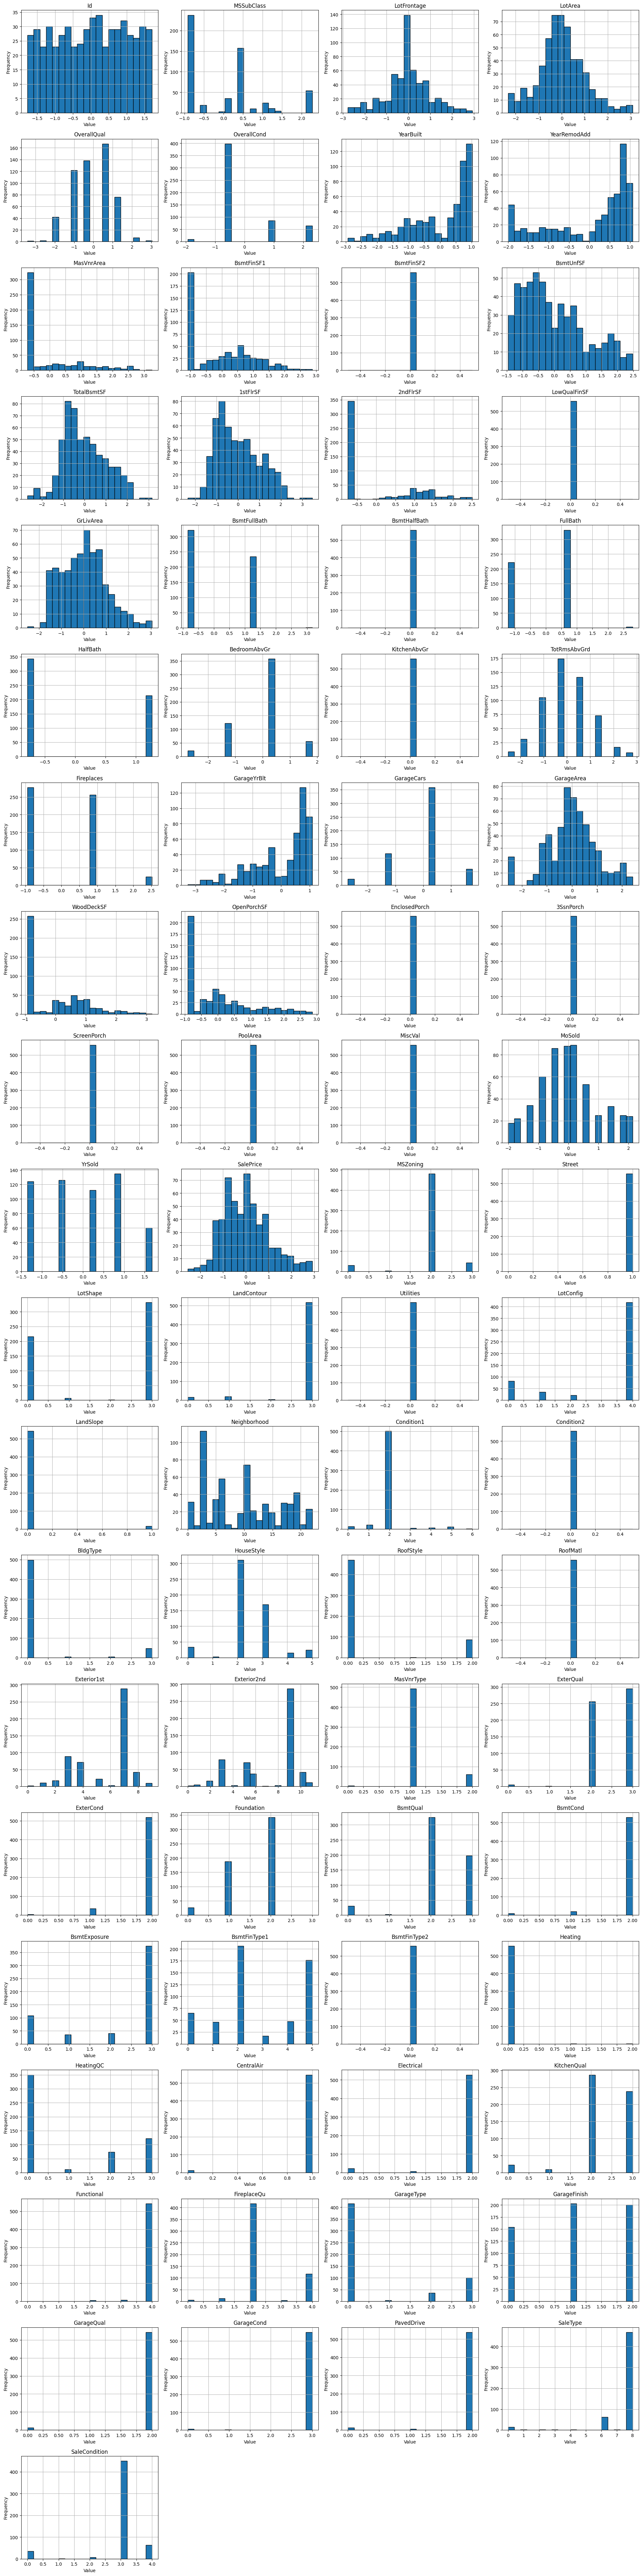

In [32]:
# Menghitung jumlah variabel
num_vars = df_lencoder.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df_lencoder.columns):
    df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()



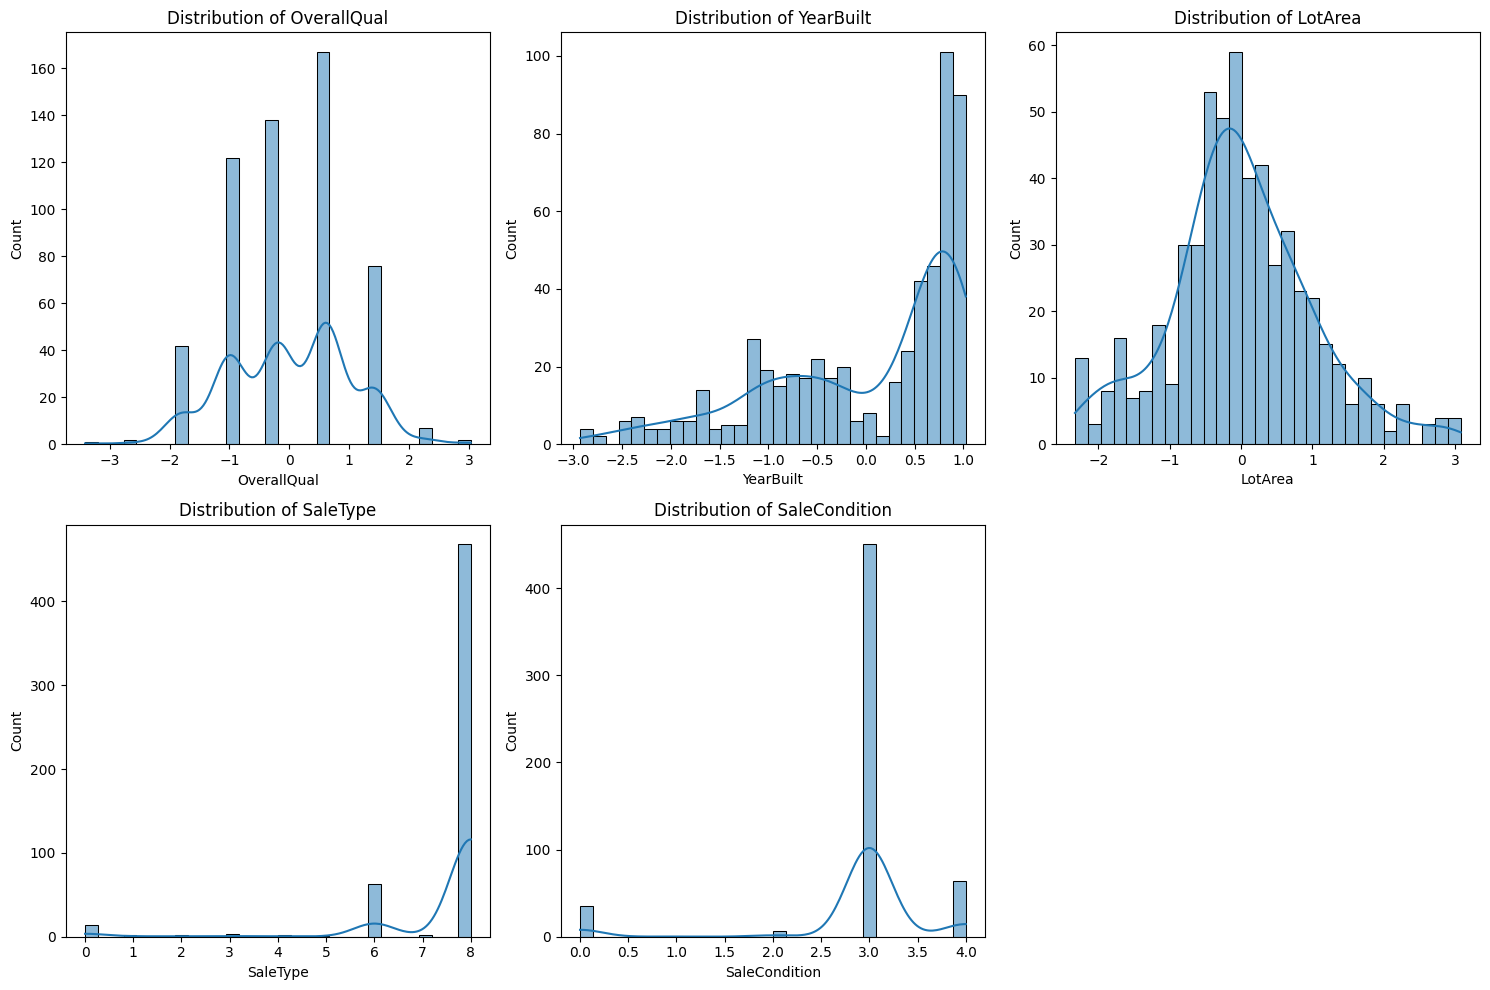

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['OverallQual', 'YearBuilt', 'LotArea', 'SaleType', 'SaleCondition']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_lencoder[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()



* OverallQual: sebagian besar data terkonsentrasi di sekitar nilai tengah dengan distribusi miring ke kanan.
* YearBuilt: distribusi cenderung normal dengan beberapa lonjakan pada tahun tertentu, menunjukkan periode pembangunan rumah yang lebih aktif.
* LotArea: distribusinya tidak simetris karena adanya beberapa outlier yang signifikan pada sisi kanan (lot area yang sangat besar).
* SaleType: kategori tertentu mendominasi distribusi, menunjukkan preferensi atau pola tertentu dalam tipe penjualan.
* SaleCondition: mirip dengan SaleType, beberapa kondisi penjualan lebih umum dibandingkan lainnya.



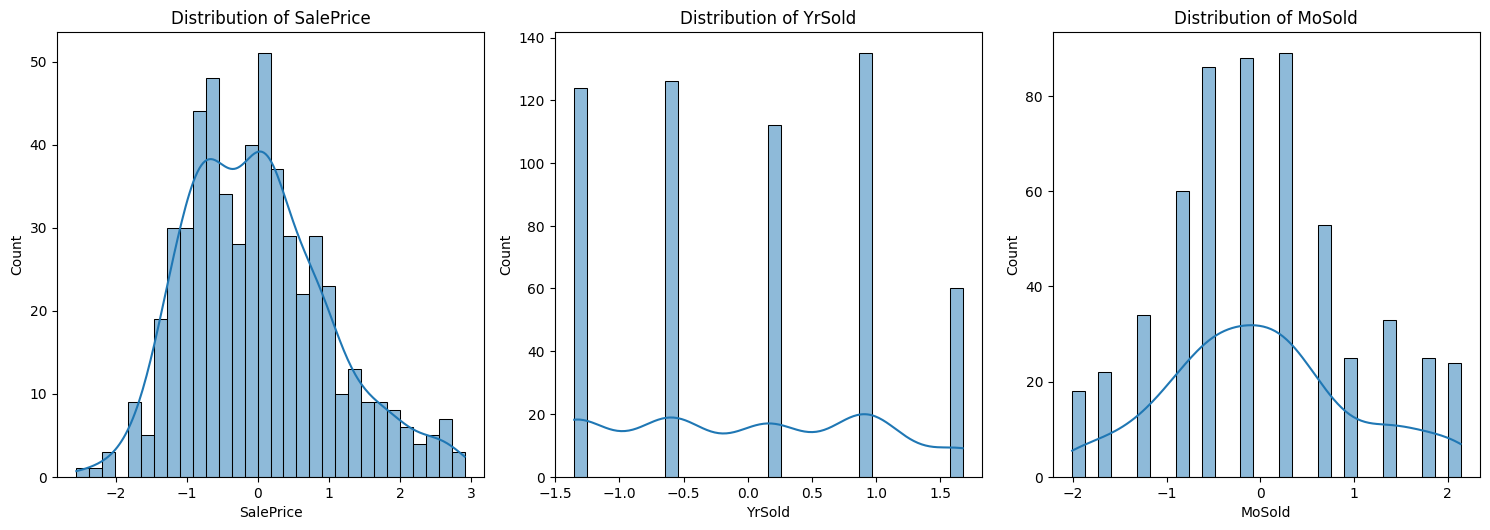

In [34]:
columns_to_plot = ['SalePrice', 'YrSold','MoSold']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_lencoder[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()



*   Harga jual rumah kebanyakan mendekati rata rata, hanya sedikit rumah yang harganya jauh di atas atau di bawah rata rata
*   Penjualan rumah tiap tahun cenderung stabil
* Penjualan rumah terbanayak kebanyakan ada di 3 bulan pertengahan tahun



Melihat korelasi tiap feature

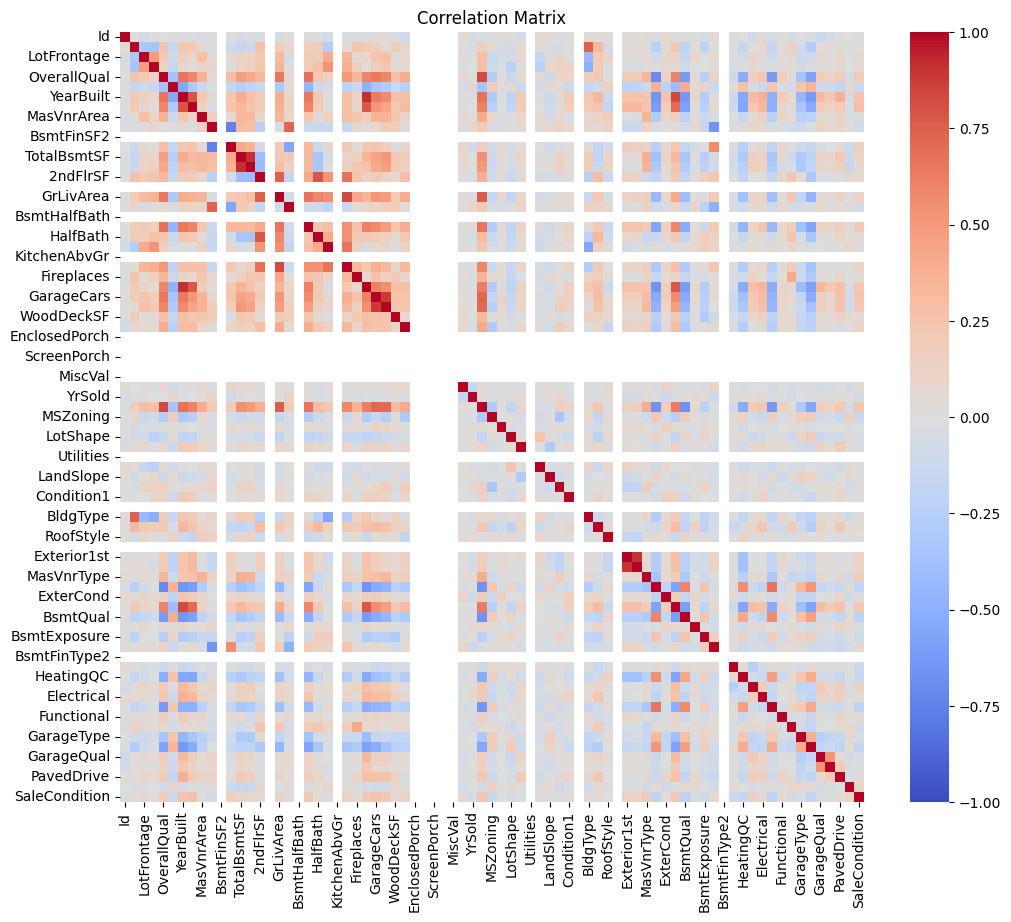

In [35]:
plt.figure(figsize=(12,10))
correlation_matrix = df_lencoder.corr()


sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1,vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [36]:
correlation_matrix = df_lencoder.corr()
saleprice_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(saleprice_corr.head(10))  # Korelasi tertinggi ke SalePrice

SalePrice       1.000000
OverallQual     0.832256
GrLivArea       0.762786
GarageCars      0.720632
GarageArea      0.704030
YearBuilt       0.677840
FullBath        0.669307
Foundation      0.632838
GarageYrBlt     0.624928
YearRemodAdd    0.604176
Name: SalePrice, dtype: float64


matriks korelasi hanya terhadap variabel atau fitur SalePrice saja sebagai variabel dependen pada studi kasus ini.

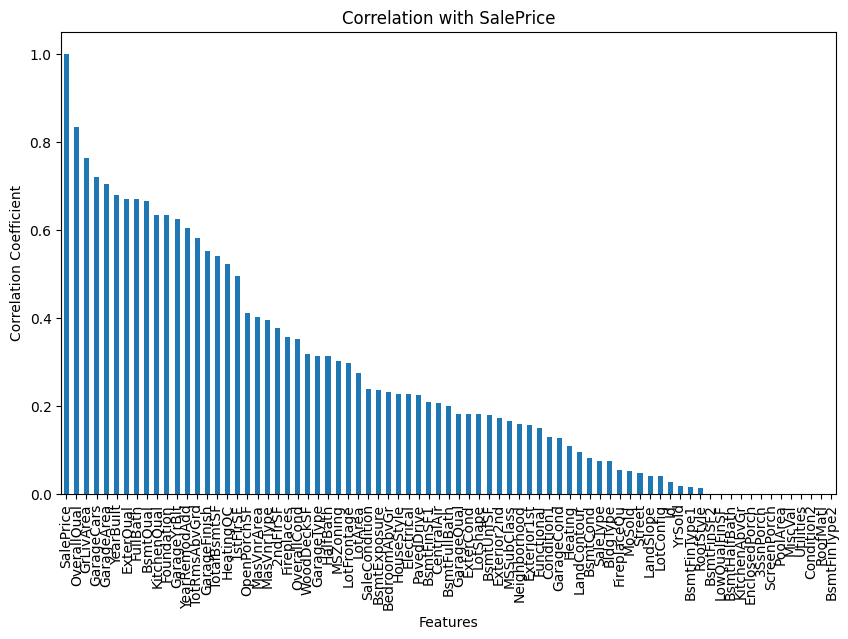

In [37]:
target_corr = df_lencoder.corr()['SalePrice']


target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title('Correlation with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

# Data Split

In [38]:
import sklearn

# Memisahkan fitur (X) dan target (y)
X = df_lencoder.drop(columns=['SalePrice'])
y = df_lencoder['SalePrice']

In [39]:
from sklearn.model_selection import train_test_split
# membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [40]:
# menghitung panjang/jumlah data
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  557
Jumlah data latih:  445
Jumlah data test:  112


# Pembangunan Model


In [41]:
# Melatih model 1 dengan algoritma Least Angle Regression

from sklearn import linear_model

lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

In [42]:
# Melatih model 2 dengan algoritma Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)


In [43]:
# Melatih model 3 dengan algoritma Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train,y_train)

GradientBoostingRegressor(random_state=184)

In [44]:
#Evaluasi Model LARS

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred_lars = lars.predict(x_test)

mae_lars = mean_absolute_error(y_test,pred_lars)
mse_lars = mean_squared_error(y_test,pred_lars)
r2_lars = r2_score(y_test,pred_lars)

# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}

# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=['Lars'])
df_results

,MAE,MSE,R2
Lars,0.720054,0.817625,-0.018517


In [45]:
# Evaluasi pada model Linear Regression
pred_LR = LR.predict(x_test)
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

# Menambahkan hasil evaluasi LR ke DataFrame
df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results


,MAE,MSE,R2
Lars,0.720054,0.817625,-0.018517
Linear Regression,0.237356,0.095778,0.880690


In [46]:
# Evaluasi model Gradient Boositing Regressor

grr_pred =GBR.predict(x_test)

mae_GBR = mean_absolute_error(y_test,grr_pred)
mse_GBR = mean_squared_error(y_test,grr_pred)
r2_GBR = r2_score(y_test,grr_pred)

df_results.loc['Gradient Boosting Regressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
Lars,0.720054,0.817625,-0.018517
Linear Regression,0.237356,0.095778,0.880690
Gradient Boosting Regressor,0.217360,0.089055,0.889065


In [47]:
# Menyimpan model

import joblib

joblib.dump(GBR,'gbr_model.joblib')

['gbr_model.joblib']

# Deployment dan Monitoring

In [48]:
# memuat model dari joblib

joblib_model = joblib.load('gbr_model.joblib')

